- NPS 고객 피드백 기반의 워드 클라우드 만드는 코드

In [1]:
import pandas as pd
from konlpy.tag import Mecab
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
tmp = pd.read_csv("wordcloud/nps_report.csv")
tmp.head()


,Date,NPS
0,2018-11-12,문제 미해결
1,2018-11-12,처음 구매시 주문 잘못넣어줌으로 인해 (이것도 배송일 지정땜에 매장 3번감) 배송일...
2,2018-11-12,준제 미해결
3,2018-11-12,사고 싶어도 온라인 쇼핑몰 너무 불편해요. 이케아 온라인 쇼핑은 소비자가 물건 못 ...
4,2018-11-12,직원 서비스 개선및 재고 관리


In [3]:
text = []
for i in range(len(tmp)):
    text.append(tmp.iloc[i,1])
text[:100]

['문제 미해결',
 '처음 구매시 주문 잘못넣어줌으로 인해 (이것도 배송일 지정땜에 매장 3번감) 배송일 지정후에도 배송일에 늦게와서 이사비용 30만원손해보고 기다리는데 배송 한달째 지연중 상담 담당자 연락준다고 한 날에 휴무여서 내가 전화해서 문의했더니 그때 알려줌 총체적난국',
 '준제 미해결',
 '사고 싶어도 온라인 쇼핑몰 너무 불편해요. 이케아 온라인 쇼핑은 소비자가 물건 못 사게 약올리려고 만든 거 같아요. 3류 싸구려 쇼핑몰도 여기보다 훨씬 편해요',
 '직원 서비스 개선및 재고 관리',
 '카트에 물건을 두고온걸 뒤늦게 깨닫고 전화상담 요청드렸으나 신고된게 없으니 저녁에 다시 전화해서 확인하라고하고, 저녁에하니 신고된게 없으니 다음날 하라는 응대는 이케아답지 못하다고 생각합니다. 전화했을때 바로 매장의 경비나 기타직원들을 통해 확인했으면 카트에 두고온 물건을 충분히 찾을 수 있지않았을까 하는 아쉬움이 남습니다. 물론 두고온 사람은 저이기에 잘못한것도 저지만 안일한 응대는 많이 아쉬웠습니다',
 '조립 As 현실적인 문제좀확인해주세요 특히 주방요 제품은만족인데 서비스로인해 구매 못해요',
 '구입한 드릴이 충전이 안되는데 구입영수증이 꼭 있어야 교환이나 환불을 받을수있나요? 어떻게 찾아야할지 막막하네요',
 '물건 불량이 많은듯 싶네요 ㅡㅡ 또패킹하고 보내야하는 번거로움이 싫어요',
 '부품이 국내에 없어 한달넘게 설치가 안되고 있어 불편하네요 부품을 국내에 많이보유좀 해주세요',
 '홈페이지결제시스템 바꿔주세요 구매확정을못눌러서 매장내방했습니다.',
 '다음에 연락 주겠다는 말이 다음날로 넘어가면 지켜지지 않음',
 '직접 조립했을때 문제 발생시 A/S가 안되는것에 불편함. 쓰고 싶어도 A/S가 안되니깐 힘들게 반품을 해야함.',
 '상품의 배달이 너무 오래 걸려요. 보통 쇼핑몰은 제품선택에서 배송까지 1~2일 정도 소요되는데 이케아는 재고 있음에도 배송이 일주일 정도 소요된다고 하니 너무 속상해요.',
 '광명점 쇼룸에 몇개가 품절표시가 없어

In [4]:
from konlpy.tag import Kkma
tagger = Kkma()
tokens = []
for text in text:
    tokens += tagger.nouns(text)

print(tokens)

c:\users\chpar10\appdata\local\programs\python\python37\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


['문제', '미', '미해결', '해결', '처음', '구매', '구매시', '시', '주문', '줌', '이것', '배송', '배송일', '일', '지정', '지정땜', '땜', '매장', '3', '3번감', '번', '감', '지정후', '후', '이사', '이사비용', '비용', '30', '30만원손해', '만', '원', '손해', '달', '지연', '지연중', '중', '상담', '담당자', '연락', '날', '휴무', '휴무여', '여', '내가', '전화', '문의', '그때', '총체적', '총체적난국', '난국', '저', '미', '미해결', '해결', '온라인', '쇼핑몰', '불편', '쇼핑', '소비자', '물건', '거', '3', '3류', '류', '싸구려', '여기', '직원', '서비스', '개선', '재고', '관리', '카트', '물건', '전화', '전화상담', '상담', '요청', '신고', '저녁', '확인', '다음날', '하라', '응대', '답지', '하다', '생각', '때', '바', '매장', '경비', '기타', '기타직원', '직원', '수', '아쉬움', '사람', '저', '잘못', '저지', '일한', '조립', '현', '현실적', '실적', '문제', '확인', '주세', '주방', '제품', '만족', '서비스', '구매', '구입', '드릴', '충전', '구입영수증', '영수증', '교환', '환불', '수', '물건', '불량', '듯', '패킹', '번거로움', '부품', '국내', '달', '설치', '불편', '보유', '홈페이지', '홈페이지결제시스템', '결제', '시스템', '주세', '구매', '구매확정', '확정', '매장', '매장내방', '내방', '다음', '연락', '말', '다음날', '직접', '조립', '때', '문제', '발생', '불편', '반품', '상품', '배달', '보통', '쇼핑몰', '제품', '제품선택', '선택', '배송', '1', '

In [5]:
from PIL import Image
import numpy as np

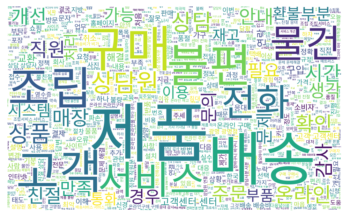

In [6]:
mask = np.array(Image.open('wordcloud/cloud.png'))

wordcloud = WordCloud(
    font_path=r'C:/Windows/Fonts/NotoIKEAKorean-Regular.ttf',
    background_color='white',
    max_words=2000,
    mask=mask
).generate(' '.join(tokens))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
import matplotlib

import matplotlib.font_manager as fm

font_location = 'c:/windows/fonts/NotoIKEAKorean-Regular.ttf'
                    # ex - 'C:/asiahead4.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

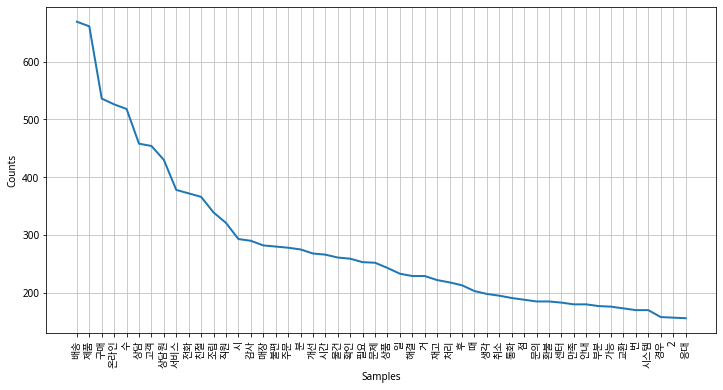

In [10]:
import nltk

plt.figure(figsize=(12,6))
words = nltk.Text(tokens, name='단어 빈도수')
words.plot(50) # 50개만
plt.show()